In [3]:
import pandas as pd
import numpy as np

In [33]:
data = pd.read_excel('data1.xlsx', sheet_name = '1')
data

,first,second,third,fourth,fifth,sixth,seventh
0,1.478837,3.524742,10.688410,8.762075,-0.639073,7,5
1,1.001225,0.704558,13.948562,8.406540,1.338411,4,7
2,12.442777,9.485070,11.323363,6.717878,11.860927,3,3
3,7.258455,4.063322,6.812343,9.374129,4.627152,4,12
4,2.847905,2.474827,13.001960,6.004247,3.497351,7,9
...,...,...,...,...,...,...,...
495,12.652488,5.980685,11.551907,15.599527,0.413245,3,16
496,3.017953,5.027926,1.647249,6.883272,16.401325,3,12
497,15.229314,7.827465,6.470981,4.492946,5.352318,3,12
498,7.899367,1.921087,10.150870,6.701511,7.854305,4,8


In [52]:
res = data.describe().T
res

,count,mean,std,min,25%,50%,75%,max
first,500.0,4.995870,7.127216,-13.871724,0.222956,4.997589,9.730043,28.640459
second,500.0,5.754075,5.007535,-6.764758,2.196860,5.598913,8.999177,21.848491
third,500.0,7.129688,5.062651,-11.707942,3.823782,6.793201,10.580811,24.817365
fourth,500.0,6.778237,3.052341,-2.544892,4.669620,6.844562,8.763167,15.599527
fifth,500.0,7.204123,6.343499,-3.960927,2.123675,7.580795,12.529470,17.665563
sixth,500.0,4.978000,2.233269,0.000000,3.000000,5.000000,7.000000,12.000000
seventh,500.0,9.980000,2.419775,3.000000,8.000000,10.000000,12.000000,17.000000


<AxesSubplot:ylabel='Density'>

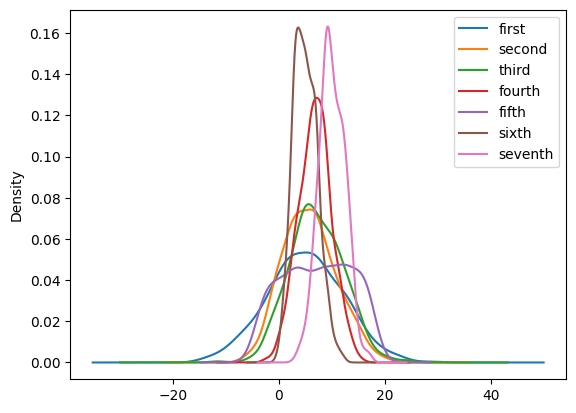

In [35]:
data.plot(kind = 'density')

In [51]:
data.skew()

first      0.024954
second     0.284607
third      0.135597
fourth    -0.037635
fifth     -0.062345
sixth      0.353924
seventh    0.057558
dtype: float64

In [48]:
data.kurtosis()

first     -0.053823
second    -0.181287
third      0.226613
fourth    -0.103252
fifth     -1.182578
sixth     -0.192180
seventh   -0.150359
dtype: float64

<AxesSubplot:>

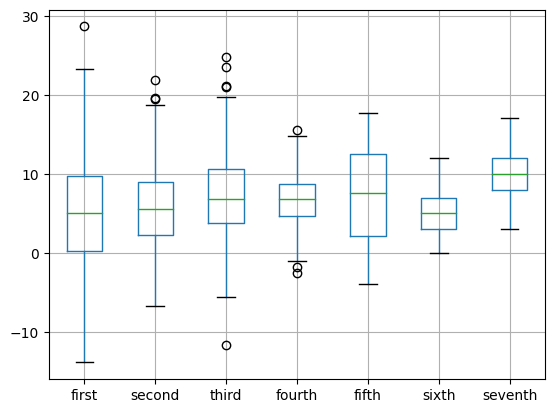

In [46]:
data.boxplot()